In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

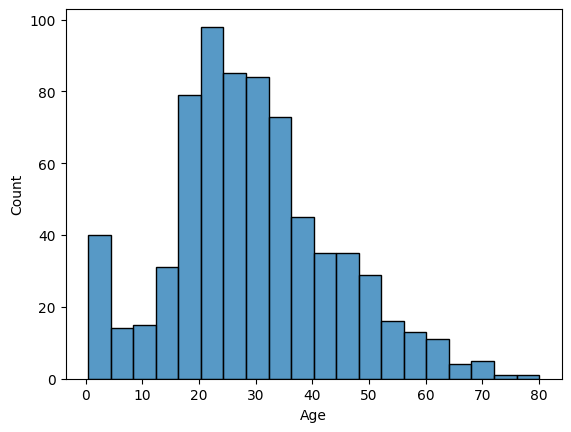

In [69]:
sns.histplot(df['Age'])

In [70]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
df['Pclass'].unique()

array([3, 1, 2])

In [73]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [74]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

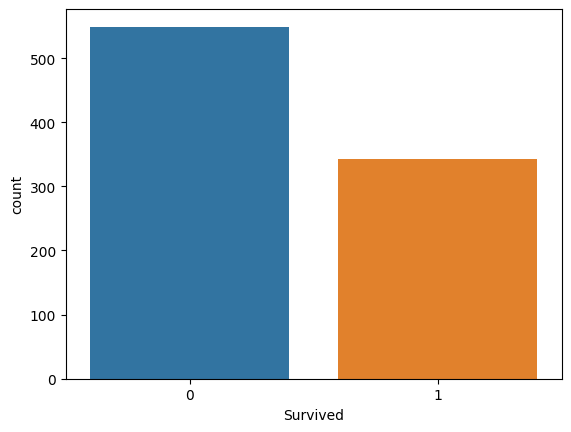

In [78]:
sns.countplot(x=df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

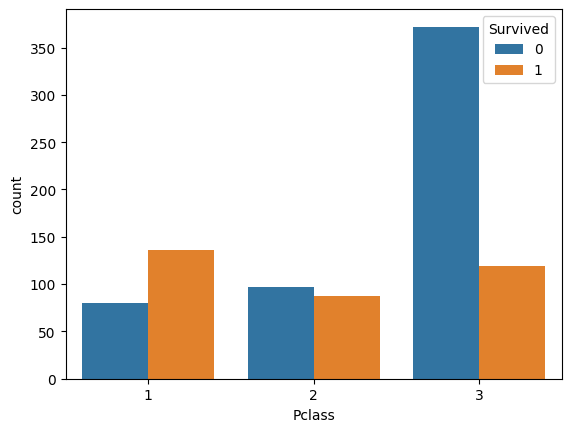

In [79]:
sns.countplot( x = df['Pclass'],hue= df['Survived'])

In [80]:
contingency = pd.crosstab(df['Pclass'],df['Survived'],margins = True)
contingency['Survived percent'] =  (contingency[1]/contingency['All'])* 100
contingency

Survived,0,1,All,Survived percent
Pclass,,,,
1,80,136,216,62.962963
2,97,87,184,47.282609
3,372,119,491,24.236253
All,549,342,891,38.383838


In [81]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Pclass'],df['Survived'],margins = True)

chi2, p,dof, expected = chi2_contingency(contingency)

In [82]:
print(p)

6.258462423531468e-20


In [83]:
if p<0.05:
    print("i will use pclass")

i will use pclass


<Axes: xlabel='Sex', ylabel='count'>

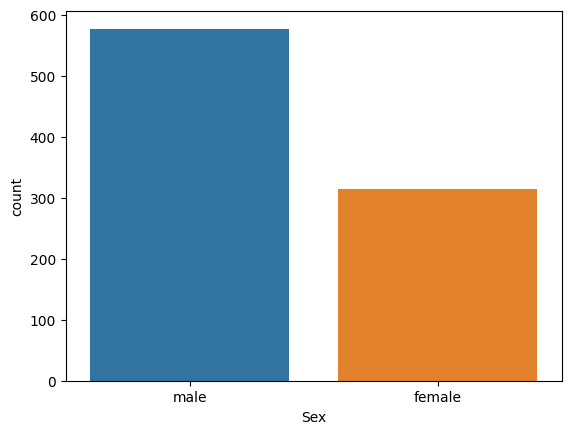

In [84]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

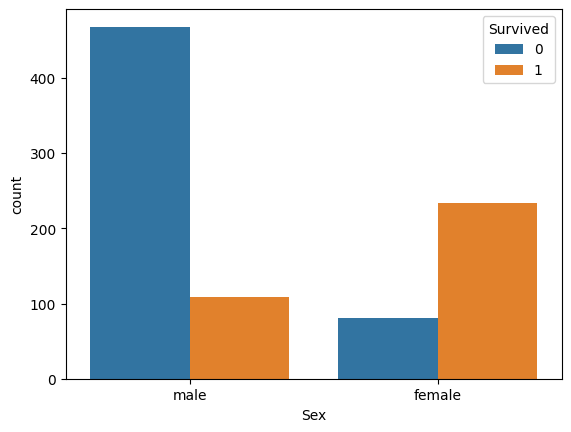

In [85]:
sns.countplot(x= df['Sex'], hue = df['Survived'])

In [86]:
contingency = pd.crosstab(df['Sex'],df['Survived'],margins = True)
contingency['Survived percent'] =  (contingency[1]/contingency['All'])* 100
contingency

Survived,0,1,All,Survived percent
Sex,,,,
female,81,233,314,74.203822
male,468,109,577,18.890815
All,549,342,891,38.383838


In [87]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Sex'],df['Survived'],margins = True)

chi2, p,dof, expected = chi2_contingency(contingency)

if p<0.05:
    print("i will use sex")

i will use sex


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

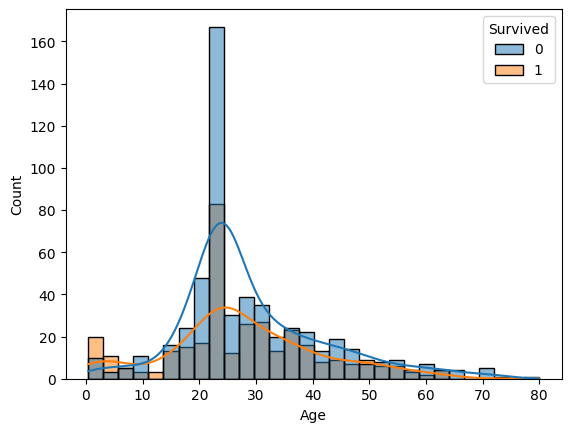

In [88]:
sns.histplot(data=df ,x='Age',hue='Survived',kde =True)

<Axes: xlabel='Survived', ylabel='Age'>

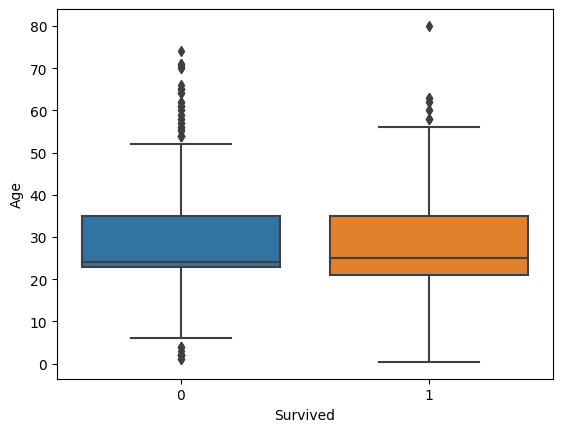

In [89]:
sns.boxplot(x=df['Survived'],y=df['Age'])

In [90]:
df[['Age','Survived']].corr()


,Age,Survived
Age,1.000000,-0.052872
Survived,-0.052872,1.000000


In [91]:
from scipy import stats

age_survived = df[df['Survived']==1]['Age'].dropna()
age_not_survived = df[df['Survived'] ==0]['Age'].dropna()

t_stat,p_value = stats.ttest_ind(age_survived,age_not_survived)

print(f"T-statistics:{t_stat},p-value:{p_value}")

T-statistics:-1.5786517588627327,p-value:0.11477168671936487


<Axes: xlabel='Age', ylabel='Fare'>

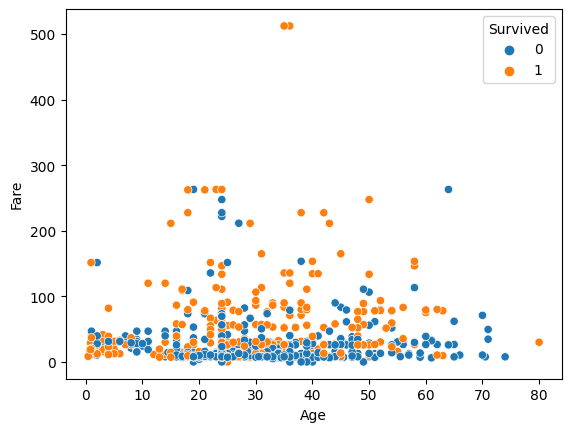

In [92]:
sns.scatterplot(y = df['Fare'], x= df['Age'],hue = df['Survived'])

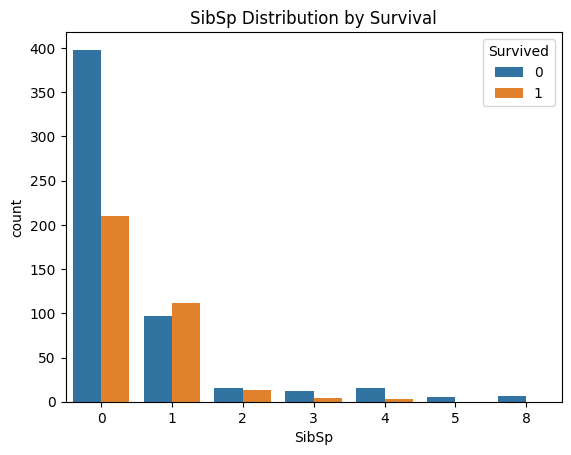

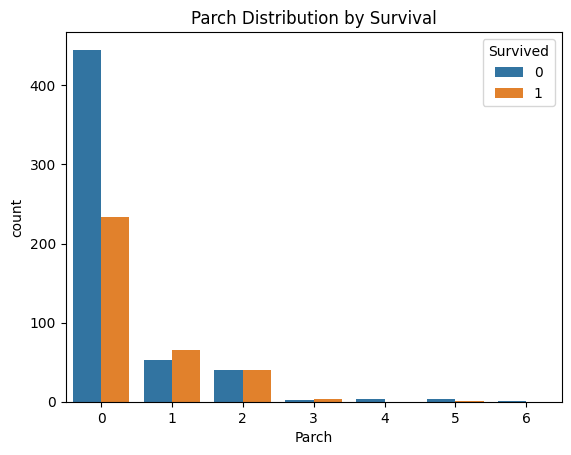

In [93]:
# sibsp plot
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title("SibSp Distribution by Survival")
plt.show()

# Parch plot
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title("Parch Distribution by Survival")
plt.show()


In [94]:
df [['SibSp','Parch','Survived']].corr()

,SibSp,Parch,Survived
SibSp,1.000000,0.414838,-0.035322
Parch,0.414838,1.000000,0.081629
Survived,-0.035322,0.081629,1.000000


In [95]:
from scipy import stats

# SibSp: Survivors vs. Non-survivors
sibsp_survived = df[df['Survived'] == 1]['SibSp']
sibsp_not_survived = df[df['Survived'] == 0]['SibSp']

t_stat_sibsp, p_value_sibsp = stats.ttest_ind(sibsp_survived, sibsp_not_survived)
print(f"SibSp - T-statistic: {t_stat_sibsp}, P-value: {p_value_sibsp}")

# Parch: Survivors vs. Non-survivors
parch_survived = df[df['Survived'] == 1]['Parch']
parch_not_survived = df[df['Survived'] == 0]['Parch']

t_stat_parch, p_value_parch = stats.ttest_ind(parch_survived, parch_not_survived)
print(f"Parch - T-statistic: {t_stat_parch}, P-value: {p_value_parch}")

SibSp - T-statistic: -1.053836896352195, P-value: 0.29224392869829374
Parch - T-statistic: 2.4420204414794604, P-value: 0.01479924537472806


In [96]:
if p_value_parch < 0.05:
    print("use")
    

use


In [97]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

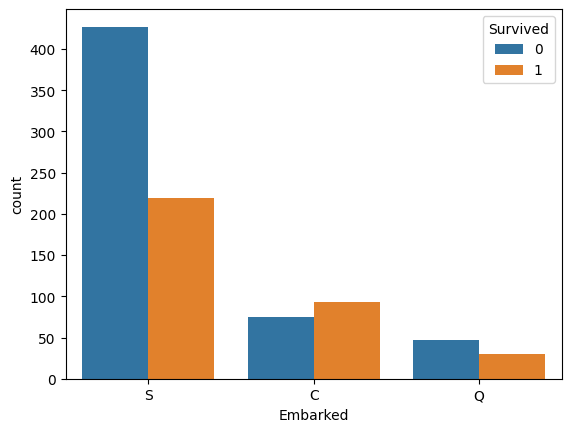

In [98]:
sns.countplot(x=df['Embarked'],hue =df['Survived'],data=df)

In [99]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Embarked'],df['Survived'],margins = True)

chi2, p,dof, expected = chi2_contingency(contingency)

In [100]:
print(p)

0.00022606281100844098


In [114]:
newdf =df[['Survived','Parch','Fare','Pclass','Sex','Embarked']]

In [115]:
newdf

,Survived,Parch,Fare,Pclass,Sex,Embarked
0,0,0,7.2500,3,male,S
1,1,0,71.2833,1,female,C
2,1,0,7.9250,3,female,S
3,1,0,53.1000,1,female,S
4,0,0,8.0500,3,male,S
...,...,...,...,...,...,...
886,0,0,13.0000,2,male,S
887,1,0,30.0000,1,female,S
888,0,2,23.4500,3,female,S
889,1,0,30.0000,1,male,C


In [116]:
newdf['Sex'] = newdf['Sex'].map({"male":0,'female':1})

/tmp/ipykernel_30/1008269803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Sex'] = newdf['Sex'].map({"male":0,'female':1})


In [117]:
newdf

,Survived,Parch,Fare,Pclass,Sex,Embarked
0,0,0,7.2500,3,0,S
1,1,0,71.2833,1,1,C
2,1,0,7.9250,3,1,S
3,1,0,53.1000,1,1,S
4,0,0,8.0500,3,0,S
...,...,...,...,...,...,...
886,0,0,13.0000,2,0,S
887,1,0,30.0000,1,1,S
888,0,2,23.4500,3,1,S
889,1,0,30.0000,1,0,C


In [118]:
newdf['Embarked'] = newdf['Embarked'].map({"S":0,'C':1,'Q':2})

/tmp/ipykernel_30/3629306908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Embarked'] = newdf['Embarked'].map({"S":0,'C':1,'Q':2})


In [119]:
newdf

,Survived,Parch,Fare,Pclass,Sex,Embarked
0,0,0,7.2500,3,0,0
1,1,0,71.2833,1,1,1
2,1,0,7.9250,3,1,0
3,1,0,53.1000,1,1,0
4,0,0,8.0500,3,0,0
...,...,...,...,...,...,...
886,0,0,13.0000,2,0,0
887,1,0,30.0000,1,1,0
888,0,2,23.4500,3,1,0
889,1,0,30.0000,1,0,1


In [120]:
newdf.columns

Index(['Survived', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [122]:
X = df[['Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y =df['Survived']


In [123]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [125]:
# Step 1: One-hot encode categorical columns 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 2: Define features and target
X = df_encoded[['Parch', 'Fare', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']]  # Adjust column names as per encoded data
y = df_encoded['Survived']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Step 4: Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred = log_reg.predict(X_test)

In [128]:
y_test

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
Name: Survived, dtype: int64

In [129]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1])

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [131]:
cm

array([[3, 0],
       [1, 5]])

In [132]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.75,
  'recall': 1.0,
  'f1-score': 0.8571428571428571,
  'support': 3},
 '1': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.875,
  'recall': 0.9166666666666667,
  'f1-score': 0.8831168831168831,
  'support': 9},
 'weighted avg': {'precision': 0.9166666666666666,
  'recall': 0.8888888888888888,
  'f1-score': 0.8917748917748918,
  'support': 9}}

In [135]:
testing = pd.read_csv('/kaggle/input/titanic/test.csv')
ids =testing['PassengerId']

In [136]:
newdf.columns

Index(['Survived', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [137]:
test =testing[['Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]


In [141]:
test.info()
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Parch     418 non-null    int64  
 1   Fare      418 non-null    float64
 2   Pclass    418 non-null    int64  
 3   Sex       418 non-null    object 
 4   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


/tmp/ipykernel_30/2986870531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])


,Parch,Fare,Pclass,Sex,Embarked
0,0,7.8292,3,male,Q
1,0,7.0000,3,female,S
2,0,9.6875,2,male,Q
3,0,8.6625,3,male,S
4,1,12.2875,3,female,S
...,...,...,...,...,...
413,0,8.0500,3,male,S
414,0,108.9000,1,female,C
415,0,7.2500,3,male,S
416,0,8.0500,3,male,S


In [148]:
# Apply the same one-hot encoding to the test dataset
test_encoded = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure that test_encoded has the same columns as X
# Add missing columns as 0 to align with training data
for col in X.columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

# Reorder columns to match X
test_encoded = test_encoded[X.columns]




In [152]:
subm = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [153]:
subm

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [154]:
submission = log_reg.predict(test_encoded)

In [155]:
submission


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [156]:
final = pd.DataFrame({"PassengerId":ids.values,"Survived":submission})

In [157]:
final

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [158]:
final.to_csv("submission.csv",index = False)

In [159]:
import os
print(os.getcwd())


/kaggle/working
